# Lab | Data Cleaning and Formatting

Objective: Apply Python programming to perform data cleaning and formatting, including identifying and handling with missing values, duplicates, outliers, errors, and using various formatting techniques such as changing data types, renaming columns, and handling string values, to prepare data for analysis.

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')

In [3]:
data = data.drop_duplicates()
data


,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,Cali,F,High School or Below,2031499.76%,63209.0,102.0,1/2/00,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47%,16061.0,88.0,1/0/00,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11%,79487.0,114.0,1/0/00,Special Auto,SUV,547.200000
1070,MY31220,California,F,College,899704.02%,54230.0,112.0,1/0/00,Personal Auto,Two-Door Car,537.600000


In [4]:
data = data.drop(1071, axis = 0)
data

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,305955.03%,38644.0,78.0,1/1/00,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,Cali,F,High School or Below,2031499.76%,63209.0,102.0,1/2/00,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47%,16061.0,88.0,1/0/00,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11%,79487.0,114.0,1/0/00,Special Auto,SUV,547.200000


## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

In [5]:
# Your code here    #Snake Case
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = cols

data = data.rename(columns={'st':'state'})
print(data.columns)

Index(['customer', 'state', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they contain only valid data. For example, the gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

In [6]:
data.isna().sum()

customer                       0
state                          0
gender                       117
education                      0
customer_lifetime_value        3
income                         0
monthly_premium_auto           0
number_of_open_complaints      0
policy_type                    0
vehicle_class                  0
total_claim_amount             0
dtype: int64

In [7]:
data['gender'].value_counts(dropna=False)

F         457
M         413
NaN       117
Male       39
female     28
Femal      17
Name: gender, dtype: int64

In [8]:
# Your code here  I chose 'F' to fill nans because it is the mode.
data['gender']= data['gender'].fillna('F')

In [9]:
data['gender']=np.where(data['gender'].isin(['F', 'female', 'Femal']),'F','M')
data['gender'].value_counts()

F    619
M    452
Name: gender, dtype: int64

In [10]:
data.state.value_counts()

Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: state, dtype: int64

In [11]:
value_mapping = {
    'Cali': 'California',
    'WA': 'Washington',
    'AZ': 'Arizona'}

data['state'] = data['state'].replace(value_mapping)

In [12]:
data.state.value_counts(dropna=False)

California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: state, dtype: int64

In [13]:
data.education.value_counts()

Bachelor                324
College                 313
High School or Below    296
Master                   94
Doctor                   37
Bachelors                 7
Name: education, dtype: int64

In [14]:
data.education = np.where(data.education == 'Bachelors','Bachelor',data.education)

In [15]:
data.education.value_counts()

Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: education, dtype: int64

In [16]:
data.vehicle_class.value_counts()

Four-Door Car    576
Two-Door Car     205
SUV              199
Sports Car        57
Luxury SUV        20
Luxury Car        14
Name: vehicle_class, dtype: int64

#### this code found at https://stackoverflow.com/questions/55954111/how-to-have-lists-elements-as-a-condition-in-np-where

In [17]:
car_list = ['Sports Car', 'Luxury SUV', 'Luxury Car']

data.vehicle_class = np.where(data.vehicle_class.isin(car_list),'Luxury',data.vehicle_class)

In [18]:
data.vehicle_class.value_counts()

Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: vehicle_class, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate. 

It is important to note that this exercise does not involve handling null values (NaN or None).

In [19]:
# Your code here
data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value       object
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [20]:
data['customer_lifetime_value']=data['customer_lifetime_value'].str.replace('%','')
data['customer_lifetime_value']=pd.to_numeric(data['customer_lifetime_value'], errors='coerce')/100
data['customer_lifetime_value']

0              NaN
1        6979.5359
2       12887.4317
3        7645.8618
4        5363.0765
           ...    
1066     3059.5503
1067    20314.9976
1068     3239.1247
1069     4626.8011
1070     8997.0402
Name: customer_lifetime_value, Length: 1071, dtype: float64

In [21]:
new_list = []

for item in data['number_of_open_complaints']:
    new_list.append(item.split('/')[1])
    
    
data['number_of_open_complaints']=new_list
data['number_of_open_complaints']

0       0
1       0
2       0
3       0
4       0
       ..
1066    1
1067    2
1068    0
1069    0
1070    0
Name: number_of_open_complaints, Length: 1071, dtype: object

In [22]:
data['number_of_open_complaints']=pd.to_numeric(data['number_of_open_complaints'], errors = 'coerce')

In [23]:
data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the isnull() function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (we haven't studied this yet)

Implement your chosen strategy to handle the null values. You can use the fillna() function in pandas to fill null values or dropna() function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the isnull() function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values. 


After formatting data types, as a last step, convert all the numeric variables to integers using applymap.

Save the cleaned dataset to a new CSV file.

In [24]:
# Your code here  I have already filled 'gender' NaN values with MODE
data.isna().sum()

customer                     0
state                        0
gender                       0
education                    0
customer_lifetime_value      3
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

In [25]:
mean=data['customer_lifetime_value'].mean()

In [26]:
mean

7936.902593445706

In [27]:
data['customer_lifetime_value'] = data['customer_lifetime_value'].fillna(mean)
data['customer_lifetime_value']

0        7936.902593
1        6979.535900
2       12887.431700
3        7645.861800
4        5363.076500
            ...     
1066     3059.550300
1067    20314.997600
1068     3239.124700
1069     4626.801100
1070     8997.040200
Name: customer_lifetime_value, Length: 1071, dtype: float64

In [28]:
data['customer_lifetime_value'] = data['customer_lifetime_value'].round(decimals = 2)
data['customer_lifetime_value']

0        7936.90
1        6979.54
2       12887.43
3        7645.86
4        5363.08
          ...   
1066     3059.55
1067    20315.00
1068     3239.12
1069     4626.80
1070     8997.04
Name: customer_lifetime_value, Length: 1071, dtype: float64

## Exercise 5: Dealing with duplicates

Use the .duplicated() method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the drop_duplicates() function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using .duplicated().

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

In [29]:
# Your code here
# This was handled right after importing the data.  Now saving the cleaned dataset.
data.to_csv('customer_cleaned.csv', index=False) 

#index = False so when read back will not have Unnamed 0 column

# Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting. 

Write these functions in a separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain. 

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [30]:
data2 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')

In [31]:
# Your code here
def clean_df(df):
    n_cols = []
    for i in range(len(df.columns)):
        n_cols.append(df.columns[i].lower().replace(' ', '_'))
    df.columns = n_cols
    df = df.rename(columns={'st':'state'})
    df = df.drop_duplicates()
    df = df.drop(1071, axis = 0)
    df['gender']= df['gender'].fillna('F')
    df['gender']=np.where(df['gender'].isin(['F', 'female', 'Femal']),'F','M')
    df['customer_lifetime_value']=df['customer_lifetime_value'].str.replace('%','').astype(float)/100
    new_list = []
    for item in df['number_of_open_complaints']:
        new_list.append(item.split('/')[1])
    df['number_of_open_complaints']=new_list
    df['number_of_open_complaints']=pd.to_numeric(df['number_of_open_complaints'], errors = 'coerce')
    df['customer_lifetime_value']=pd.to_numeric(df['customer_lifetime_value'], errors='coerce')
    df['customer_lifetime_value'] = df['customer_lifetime_value'].fillna(df['customer_lifetime_value'].mean()).round(decimals = 2)
    
    return df

In [32]:
data2 = clean_df(data2)
data2

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,7936.90,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.54,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.43,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.86,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.08,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,3059.55,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,Cali,F,High School or Below,20315.00,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.12,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.80,79487.0,114.0,0,Special Auto,SUV,547.200000


# Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we tried to do work with that column, we wouldn't have been able to do it because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, lets get some more interesting insights!

Instructions:

- Review again the statistics for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the .describe() method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [33]:
# Your code here
data2[['total_claim_amount','customer_lifetime_value']].describe(include = 'all')

,total_claim_amount,customer_lifetime_value
count,1071.000000,1071.000000
mean,404.986909,7936.902521
std,293.027260,6425.757110
min,0.382107,2004.350000
25%,202.157702,4048.535000
50%,354.729129,5887.180000
75%,532.800000,8945.210000
max,2893.239678,58166.550000


In [34]:
high_tot_claim_amt= data2[data2['total_claim_amount'] > 532.8]
low_cust_life_val= data2[data2['customer_lifetime_value']< 4048.535]

#https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
target_customers = data2.loc[(data2['total_claim_amount'] >= 532.8) & (data2['customer_lifetime_value']<= 4048.535)]
display(target_customers.shape)
target_customers
                             

(41, 11)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
17,OE15005,Cali,F,College,3945.24,28855.0,101.0,0,Personal Auto,SUV,647.442031
23,TZ98966,Nevada,F,Bachelor,2450.19,0.0,73.0,3,Corporate Auto,Four-Door Car,554.376763
26,US89481,California,F,Bachelor,3946.37,0.0,111.0,0,Personal Auto,Four-Door Car,799.200000
38,CM61827,Oregon,F,Bachelor,3090.03,0.0,90.0,0,Personal Auto,Two-Door Car,648.000000
42,IL19217,California,F,Bachelor,3939.01,60021.0,99.0,0,Personal Auto,Four-Door Car,882.871945
62,FG63582,Oregon,F,Bachelor,3339.76,0.0,94.0,0,Personal Auto,Two-Door Car,863.327324
135,MS41162,AZ,F,High School or Below,4022.96,0.0,117.0,0,Personal Auto,SUV,975.107098
140,DS81757,Oregon,M,College,2470.12,0.0,74.0,0,Personal Auto,Two-Door Car,721.242206
158,KA61892,Arizona,M,College,3873.65,28142.0,105.0,0,Personal Auto,Sports Car,701.708239
160,ND87334,California,M,High School or Below,2287.60,0.0,63.0,0,Corporate Auto,Two-Door Car,679.368378


# End of lab 

# Start of Round 3 lab

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the Gender breakdown.
- Show a plot of Income by State.
- Show a plot of the Policy Type by the Total Claim Amount.
- Show a plot of the Education by Vehicle Class.
- What insights can you establish from these plots?
- What other plots do you feel would be beneficial?

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Show DataFrame info.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   1071 non-null   object 
 1   state                      1071 non-null   object 
 2   gender                     1071 non-null   object 
 3   education                  1071 non-null   object 
 4   customer_lifetime_value    1071 non-null   float64
 5   income                     1071 non-null   float64
 6   monthly_premium_auto       1071 non-null   float64
 7   number_of_open_complaints  1071 non-null   int64  
 8   policy_type                1071 non-null   object 
 9   vehicle_class              1071 non-null   object 
 10  total_claim_amount         1071 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 100.4+ KB


In [37]:
#Describe DataFrame.
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,7936.902521,39295.701214,193.234360,0.394024,404.986909
std,6425.757110,30469.427060,1601.190369,0.883769,293.027260
min,2004.350000,0.000000,61.000000,0.000000,0.382107
25%,4048.535000,14072.000000,68.000000,0.000000,202.157702
50%,5887.180000,36234.000000,83.000000,0.000000,354.729129
75%,8945.210000,64631.000000,109.500000,0.000000,532.800000
max,58166.550000,99960.000000,35354.000000,5.000000,2893.239678


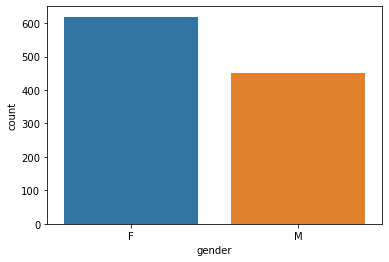

In [38]:
#Show a plot of the Gender breakdown.
sns.countplot(x='gender', data=data)

In [39]:
# What insights can you establish from these plots?
#There are more Female clients than Male clients

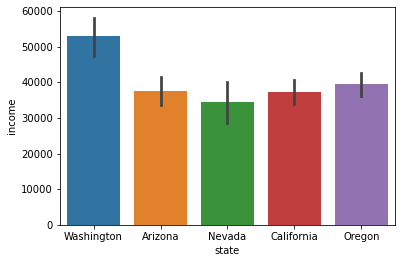

In [40]:
#Show a plot of Income by State.
sns.barplot(y='income', x='state', data=data)

In [41]:
#What insights can you establish from these plots?
#The clients in Washington State have the highest income averages

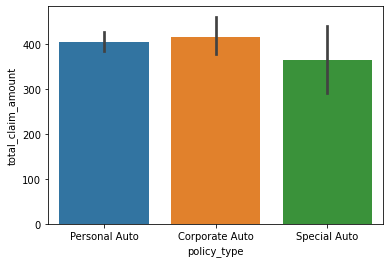

In [42]:
#Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x='policy_type', y='total_claim_amount', data=data)

In [43]:
#What insights can you establish from these plots?
#The Corporate policies have the highest average claim amounts, 
#but there is little difference with Personal policies

#### this graph from https://datascience.stackexchange.com/questions/89692/plot-two-categorical-variables
#### rotated labels from https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn

[None, None, None, None, None, None, None, None, None, None]

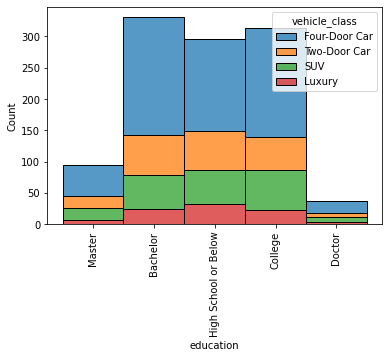

In [44]:
#Show a plot of the Education by Vehicle Class.
g = sns.histplot(x="education", hue="vehicle_class", data=data, stat="count", multiple="stack")
plt.setp(g.get_xticklabels(), rotation=90)

In [45]:
#What insights can you establish from these plots?
#The most luxury cars are insured for people with only a high school or below education level!

# Round 4

- Check the data types of the columns. Get the numeric data into a dataframe called `numerical` and categorical columns in a dataframe called `categorical`.
(You can use np.number and object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution?
- For the numerical variables, check the multicollinearity between the features. **Please note** that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features


In [46]:
data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [47]:
categorical = data.select_dtypes(include=object)
numerical = data.select_dtypes(include=np.number)

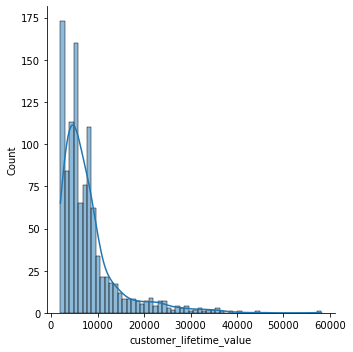

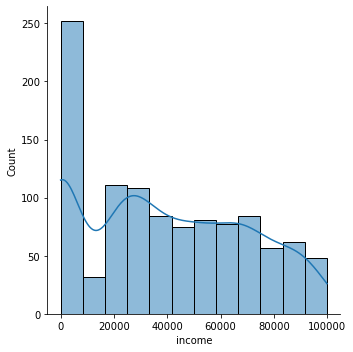

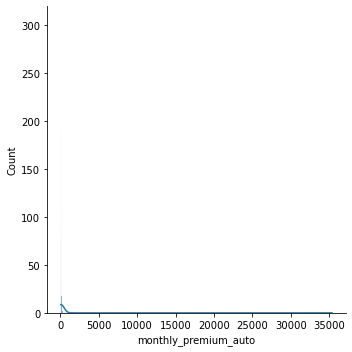

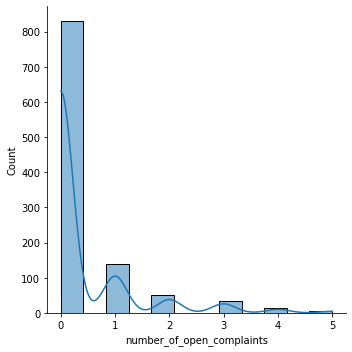

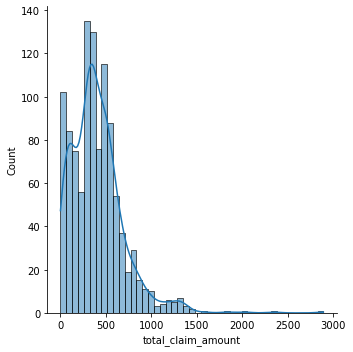

In [48]:
#Use seaborn library to construct distribution plots for the numerical variables
for column in numerical.columns:
    sns.displot(numerical[column],kde=True)
    plt.show()

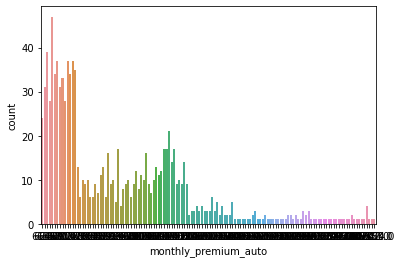

In [54]:
sns.countplot(data= numerical,x='monthly_premium_auto')

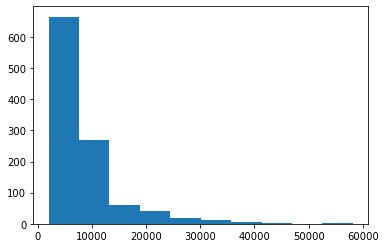

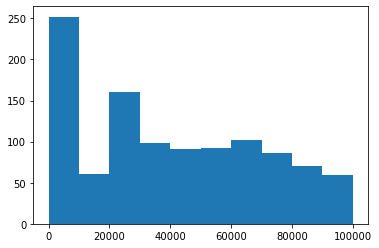

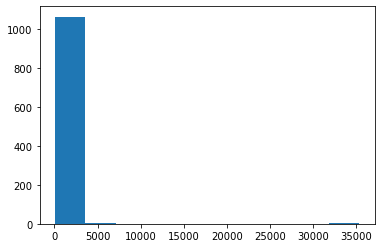

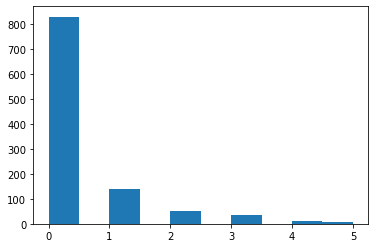

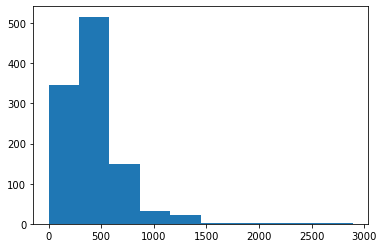

In [55]:
#Use Matplotlib to construct histograms
fig, ax = plt.subplots()
for column in numerical.columns:
    plt.hist(numerical[column])
    plt.show()

In [56]:
#For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column total_claim_amount later as the target variable.

correlations = numerical.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
customer_lifetime_value,1.000000,0.041610,0.005027,-0.028147,0.131452
income,0.041610,1.000000,0.049100,-0.004161,-0.361282
monthly_premium_auto,0.005027,0.049100,1.000000,0.025138,-0.040493
number_of_open_complaints,-0.028147,-0.004161,0.025138,1.000000,0.008470
total_claim_amount,0.131452,-0.361282,-0.040493,0.008470,1.000000


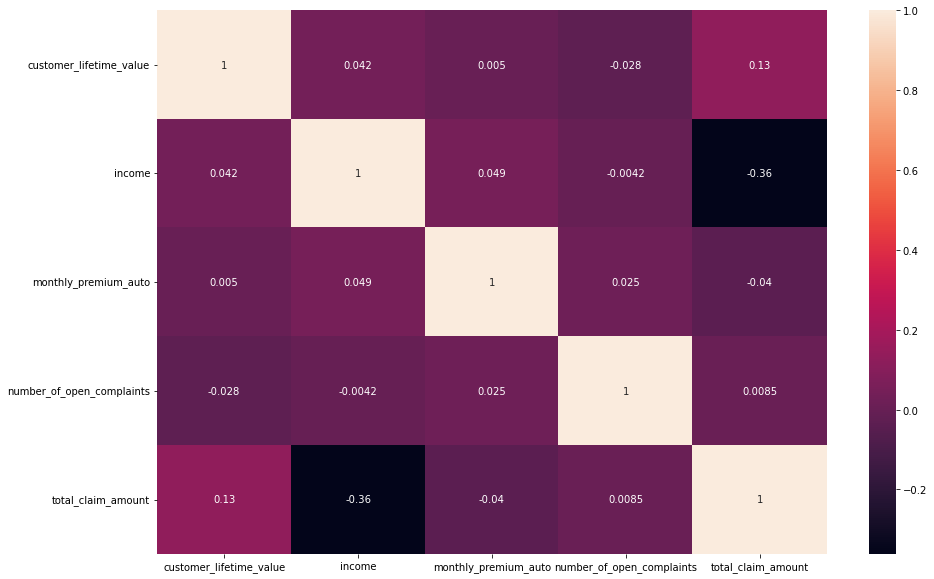

In [57]:
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(numerical.corr(), annot=True)
plt.show()

#### There doesn't seem to be any Mulicolliniarity

# Round 5

### Processing for the X y split
### X=features  y=target

In [58]:
X=data.drop('total_claim_amount', axis=1)     
y=data['total_claim_amount']

### Drop some useless columns

In [59]:
X=X.drop(columns=['customer'],axis=1)

### Again separating numerical and categorical for X-features

In [60]:
X_num1 = X.select_dtypes(np.number)
X_cat1 = X.select_dtypes(object)

In [61]:
X_num1.shape

(1071, 4)

In [62]:
# this code does the same thing in a different way
X_num=X._get_numeric_data()
X_cat=X.drop(columns=X_num.columns)

print (X.shape, X_num.shape, X_cat.shape)  # check shape

(1071, 9) (1071, 4) (1071, 5)


### Take a look at the numerical data

In [63]:
X_num.describe()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
count,1071.000000,1071.000000,1071.000000,1071.000000
mean,7936.902521,39295.701214,193.234360,0.394024
std,6425.757110,30469.427060,1601.190369,0.883769
min,2004.350000,0.000000,61.000000,0.000000
25%,4048.535000,14072.000000,68.000000,0.000000
50%,5887.180000,36234.000000,83.000000,0.000000
75%,8945.210000,64631.000000,109.500000,0.000000
max,58166.550000,99960.000000,35354.000000,5.000000


### Import Libraries

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Scaling using MinMax

In [65]:
# good for counts or if all data are positive numbers
transformer = MinMaxScaler().fit(X_num)
X_norm = transformer.transform(X_num)
print(X_norm.shape)
X_num_scale = pd.DataFrame(X_norm, columns=X_num.columns)
X_num_scale.head()

(1071, 4)


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,0.105632,0.000000,0.026606,0.0
1,0.088586,0.000000,0.000935,0.0
2,0.193779,0.487865,0.001332,0.0
3,0.100450,0.000000,0.001275,0.0
4,0.059804,0.363715,0.000198,0.0


# You only use ONE of these! 

### Scaling Standard Scaler

In [66]:
# good for measurements or if some of your values are negative.
transformer = StandardScaler().fit(X_num)
X_standard = transformer.transform(X_num)
print(X_standard.shape)
X_num_standard = pd.DataFrame(X_standard, columns=X_num.columns)
X_num_standard.head()

(1071, 4)


,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,-3.925119e-07,-1.290279,0.504089,-0.446053
1,-1.490579e-01,-1.290279,-0.062004,-0.446053
2,7.707793e-01,0.310991,-0.053257,-0.446053
3,-4.531427e-02,-1.290279,-0.054506,-0.446053
4,-4.007349e-01,-0.096493,-0.078250,-0.446053


# Round 6

### One hot encode the categorical data

In [67]:
# import the library
from sklearn.preprocessing import OneHotEncoder

In [68]:
# Create encoder to be used on new data later.

encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()



,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### concat numerical and categorical transformations for features

In [69]:
X=pd.concat([X_num_scale, X_cat_encode], axis=1) 
X.describe()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,0.105632,0.393114,0.003747,0.078805,0.309057,0.091503,0.298786,0.103641,0.422035,0.292250,0.034547,0.276377,0.087768,0.728291,0.053221,0.084967,0.185808,0.191410
std,0.114414,0.304816,0.045368,0.176754,0.462321,0.288458,0.457940,0.304937,0.494115,0.455009,0.182715,0.447415,0.283090,0.445048,0.224579,0.278963,0.389133,0.393595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036398,0.140776,0.000198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.069136,0.362485,0.000623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.123586,0.646569,0.001374,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###  Train Test Split

In [70]:
# import library
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.2)

In [71]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,policy_type_Personal Auto,policy_type_Special Auto,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
881,0.054059,0.460904,0.000085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
342,0.055504,0.000000,0.000312,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1011,0.168434,0.453721,0.006347,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
939,0.048829,0.151751,0.000057,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
319,0.012838,0.366647,0.000227,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.094094,0.795258,0.000850,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
984,0.107555,0.714196,0.000170,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
199,0.071982,0.204042,0.000425,0.2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
537,0.072290,0.000000,0.000708,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [72]:
y_train

881      25.934064
342     518.400000
1011    540.141566
939     302.400000
319      56.603330
           ...    
291     396.295614
984     284.000172
199     364.800000
537     545.240341
476     426.655599
Name: total_claim_amount, Length: 856, dtype: float64

### Train and run model

In [73]:
#import library
from sklearn.linear_model import LinearRegression as linreg

lm = linreg()    # model
lm.fit(X_train, y_train)   # model training
y_pred = lm.predict(X_test)   # model prediction

### Validation R2 scores

In [74]:
print ('train R2: {} -- test R2: {}'.format(lm.score(X_train, y_train),
                                            lm.score(X_test, y_test)))

train R2: 0.39145226394532207 -- test R2: 0.31333925331926216


### Mean Squared Error

In [75]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(lm.predict(X_train), y_train)
test_mse=mse(y_pred, y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 50548.83262189531 -- test MSE: 66227.98647710742


### Root Mean Squared Error

In [76]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 224.83067544686892 -- test RMSE: 257.34798712464686


### Mean Absolute Error

In [78]:
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(lm.predict(X_train), y_train)
test_mae=mae(y_pred, y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mae, test_mae))

train MAE: 166.06567033215615 -- test MAE: 171.17170167202502
